In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))

In [3]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_5\\Ej_1.txt',
    delimiter = '\t',
    decimal = '.',
    )

In [4]:
datos.head()

,Z(m),U(m/s),-10,-4,-2,1,2,3,4,5,7,10,16,30
0,4.0,10.6,100,100,101,101,104,104,103,100,99,98,98,100
1,2.0,9.4,100,99,95,104,103,100,97,94,94,94,88,95
2,1.0,8.3,100,94,82,22,26,32,39,45,55,66,79,94
3,0.5,7.0,100,83,61,31,23,26,37,42,46,60,83,95


In [5]:
distancias = datos.columns[2:]
vientos = datos[:]
iterador = list(range(len(datos['Z(m)'])))
for i in iterador:
    vientos.iloc[i] = datos[distancias].iloc[i] * float(datos['U(m/s)'][i])/100
vientos['Z(m)'] = [4, 2, 1, 0.5]
vientos = vientos.drop(columns = 'U(m/s)')
vientos.head()

,Z(m),-10,-4,-2,1,2,3,4,5,7,10,16,30
0,4.0,10.6,10.600,10.706,10.706,11.024,11.024,10.918,10.600,10.494,10.388,10.388,10.600
1,2.0,9.4,9.306,8.930,9.776,9.682,9.400,9.118,8.836,8.836,8.836,8.272,8.930
2,1.0,8.3,7.802,6.806,1.826,2.158,2.656,3.237,3.735,4.565,5.478,6.557,7.802
3,0.5,7.0,5.810,4.270,2.170,1.610,1.820,2.590,2.940,3.220,4.200,5.810,6.650


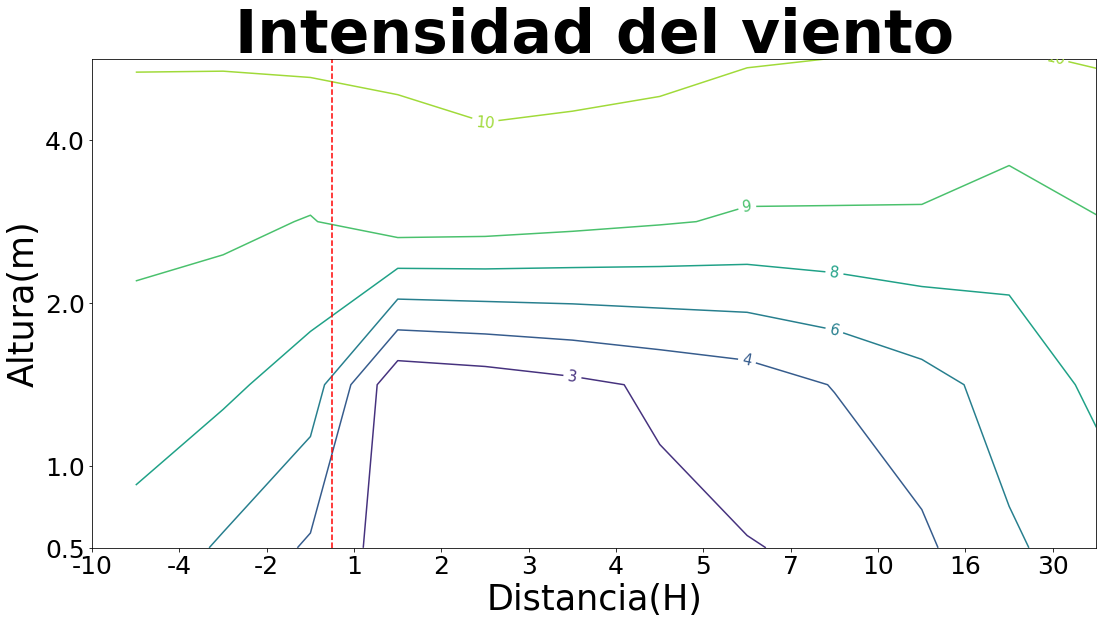

In [6]:
labels = list(range(len(distancias)))
plt.figure(figsize = (18, 9))
metadata('Intensidad del viento', 'Distancia(H)', 'Altura(m)')
plt.contour(vientos[distancias],
            origin = 'upper'
            ).clabel(inline = True, fmt = '%1.0f', fontsize = 15)
plt.yticks([3,2,1,0.5], vientos['Z(m)'])
plt.xticks(labels, distancias)
plt.axvline(2.75, color = 'red', ls = '--')
plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_5\\isolineas_u.png')

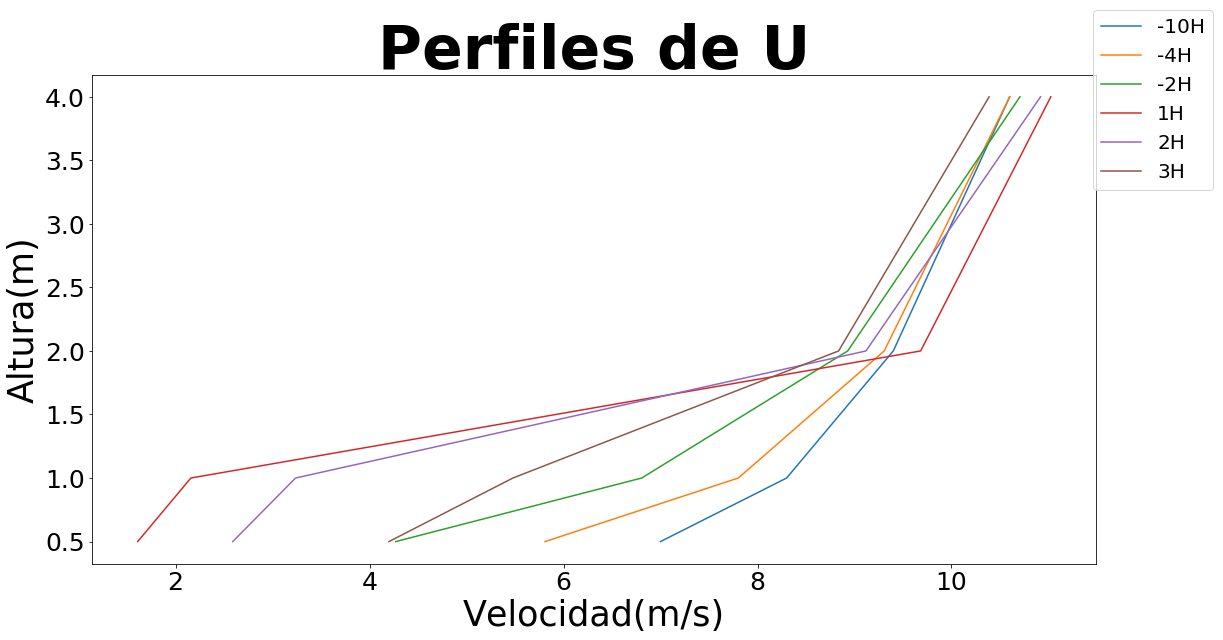

In [7]:
plt.figure(figsize = (18, 9))
metadata('Perfiles de U', 'Velocidad(m/s)', 'Altura(m)')
for i in distancias[[0, 1, 2, 4, 6, 9]]:
    plt.plot(vientos[i], vientos['Z(m)'])
plt.figlegend(distancias + 'H', fontsize = 20)
plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_5\\perfil_u.png')